In [9]:
import pandas as pd
 
# Reading the CSV file
df = pd.read_csv(r"C:\Users\Shreyash\Downloads\Iris.csv")
 
# Printing top 5 rows
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
df.shape

(150, 6)

In [11]:
#We can see that the dataframe contains 6 columns and 150 rows.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [13]:
#We can see that only one column has categorical data and all the other columns are of the numeric type with non-Null entries.

In [14]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [15]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [16]:
data = df.drop_duplicates(subset ="Species")
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
50,51,7.0,3.2,4.7,1.4,Iris-versicolor
100,101,6.3,3.3,6.0,2.5,Iris-virginica


In [17]:
df.value_counts("Species")

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [18]:
#Data Visualization

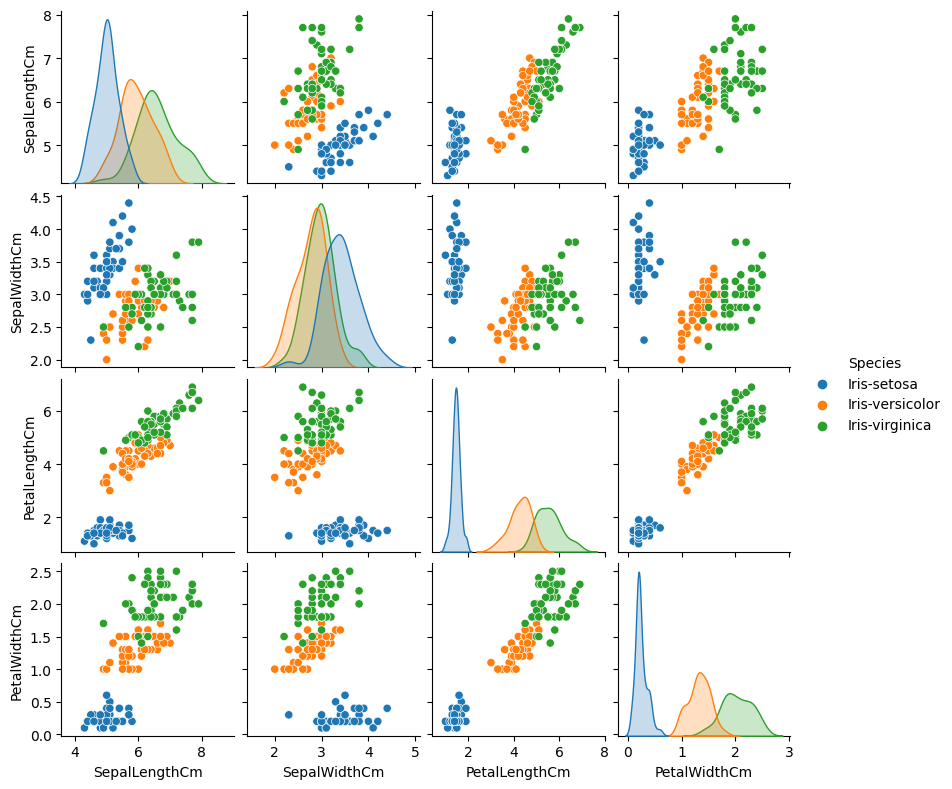

In [19]:
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt
 
 
sns.pairplot(df.drop(['Id'], axis = 1),
             hue='Species', height=2)

In [20]:
#We can see many types of relationships from this plot such as the species Setosa has the smallest of petals widths and lengths. 
#It also has the smallest sepal length but larger sepal widths. 
#Such information can be gathered about any other species.

In [21]:
#Correlation
df.corr(method='pearson')

C:\Users\Shreyash\AppData\Local\Temp\ipykernel_42480\2766356891.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method='pearson')


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


In [22]:
df=df.drop(columns="Id")

C:\Users\Shreyash\AppData\Local\Temp\ipykernel_42480\1314676927.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df.corr()


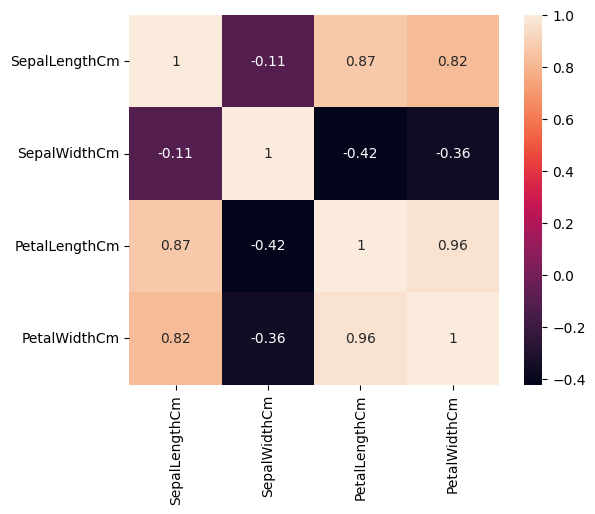

In [23]:
corrmat = df.corr()
sns.heatmap(corrmat, annot = True, square = True);

In [24]:
#The main takeaway is that the petal measurements have highly positive correlation, while the sepal one are uncorrelated. 
#The petal features also have relatively high correlation with sepal_length, but not with sepal_width.

In [25]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics

In [27]:
train, test = train_test_split(df, test_size = 0.4, stratify = df['Species'], random_state = 42)

In [28]:
print(train)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm          Species
130            7.4           2.8            6.1           1.9   Iris-virginica
6              4.6           3.4            1.4           0.3      Iris-setosa
94             5.6           2.7            4.2           1.3  Iris-versicolor
96             5.7           2.9            4.2           1.3  Iris-versicolor
26             5.0           3.4            1.6           0.4      Iris-setosa
..             ...           ...            ...           ...              ...
37             4.9           3.1            1.5           0.1      Iris-setosa
89             5.5           2.5            4.0           1.3  Iris-versicolor
33             5.5           4.2            1.4           0.2      Iris-setosa
99             5.7           2.8            4.1           1.3  Iris-versicolor
3              4.6           3.1            1.5           0.2      Iris-setosa

[90 rows x 5 columns]


In [29]:
print(test)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm          Species
40             5.0           3.5            1.3           0.3      Iris-setosa
61             5.9           3.0            4.2           1.5  Iris-versicolor
18             5.7           3.8            1.7           0.3      Iris-setosa
49             5.0           3.3            1.4           0.2      Iris-setosa
106            4.9           2.5            4.5           1.7   Iris-virginica
20             5.4           3.4            1.7           0.2      Iris-setosa
69             5.6           2.5            3.9           1.1  Iris-versicolor
93             5.0           2.3            3.3           1.0  Iris-versicolor
141            6.9           3.1            5.1           2.3   Iris-virginica
104            6.5           3.0            5.8           2.2   Iris-virginica
85             6.0           3.4            4.5           1.6  Iris-versicolor
78             6.0           2.9            4.5     

In [30]:
X_train = train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y_train = train.Species
X_test = test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y_test = test.Species

In [31]:
mod_dt = DecisionTreeClassifier(max_depth = 3, random_state = 1)
mod_dt.fit(X_train,y_train)
prediction=mod_dt.predict(X_test)
print('The accuracy of the Decision Tree is',"{:.3f}".format(metrics.accuracy_score(prediction,y_test)))

The accuracy of the Decision Tree is 0.983


In [32]:
mod_dt.feature_importances_

array([0.        , 0.        , 0.42430866, 0.57569134])

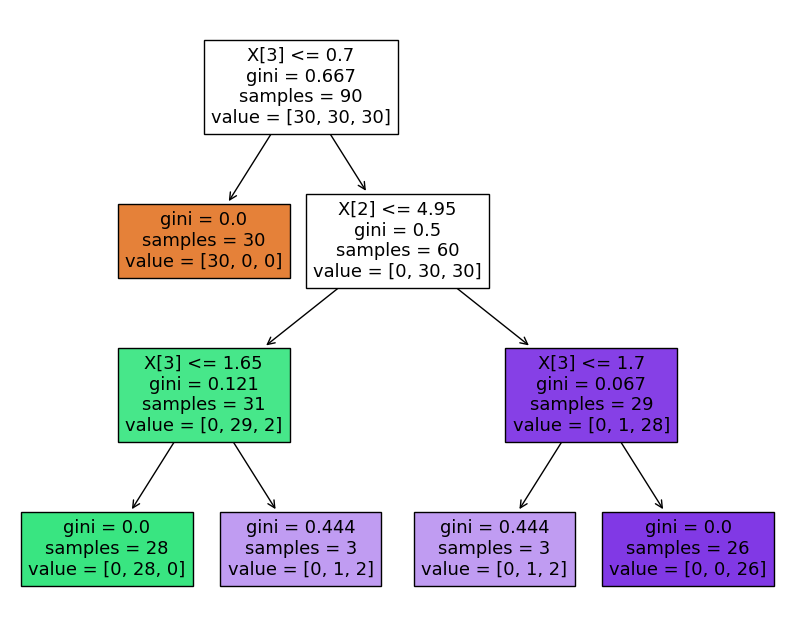

In [33]:
plt.figure(figsize = (10,8))
plot_tree(mod_dt, filled = True);

C:\Users\Shreyash\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


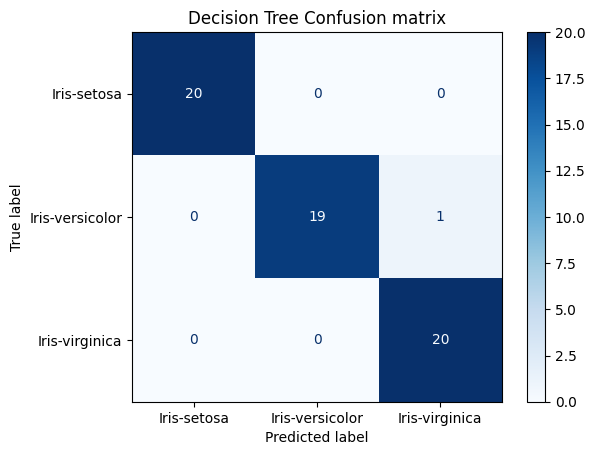

In [34]:
disp = metrics.plot_confusion_matrix(mod_dt, X_test, y_test,
                                
                                 cmap=plt.cm.Blues,
                                 normalize=None)
disp.ax_.set_title('Decision Tree Confusion matrix');

In [35]:
from sklearn.svm import SVC
mod_svm = SVC(kernel = 'linear', random_state = 5)
mod_svm.fit(X_train, y_train)
y_pred = mod_svm.predict(X_test)

In [36]:
from sklearn.metrics import confusion_matrix

print('The accuracy of the SVM Model is',"{:.3f}".format(metrics.accuracy_score(y_pred,y_test)))

The accuracy of the SVM Model is 1.000


C:\Users\Shreyash\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


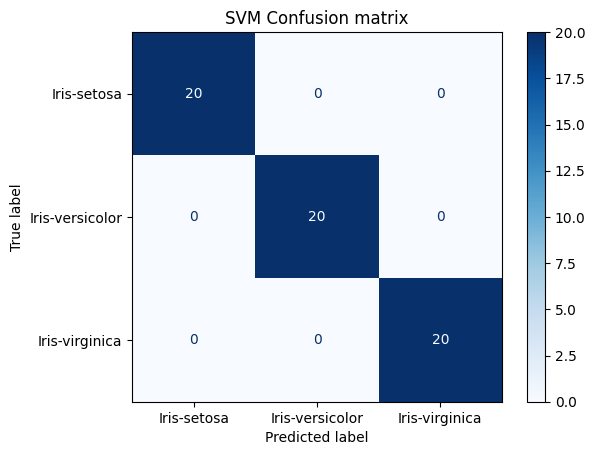

In [37]:
disp = metrics.plot_confusion_matrix(mod_svm, X_test, y_test,
                                cmap=plt.cm.Blues,
                                 normalize=None)
disp.ax_.set_title('SVM Confusion matrix');

Decision Tree Classifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

Nearest Neighbor Classifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

Naive Bayes Classifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        18

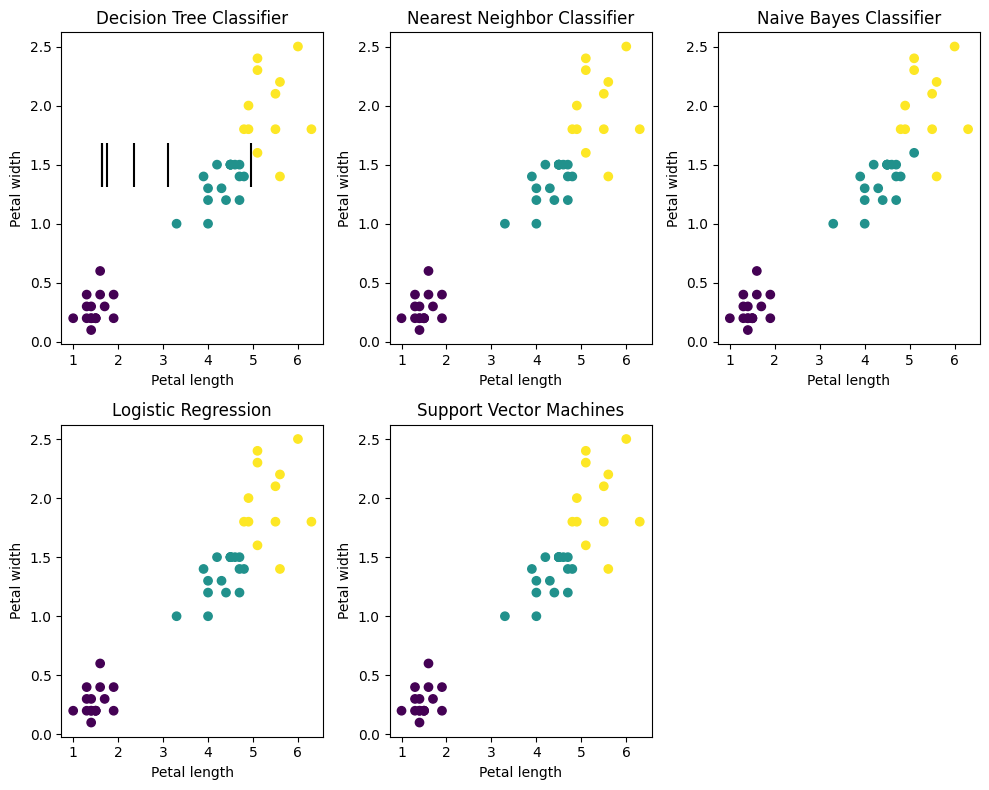

In [38]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Load iris dataset
iris = load_iris()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=0)

# Decision Tree Classifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
print("Decision Tree Classifier")
print(classification_report(y_test, dt.predict(X_test)))

# Rule-based Classifier
# Note: scikit-learn does not have a built-in rule-based classifier, so we will skip this one

# Nearest Neighbor Classifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print("Nearest Neighbor Classifier")
print(classification_report(y_test, knn.predict(X_test)))

# Naive Bayes Classifier
nb = GaussianNB()
nb.fit(X_train, y_train)
print("Naive Bayes Classifier")
print(classification_report(y_test, nb.predict(X_test)))

# Regression
lr = LogisticRegression(max_iter=10000)
lr.fit(X_train, y_train)
print("Logistic Regression")
print(classification_report(y_test, lr.predict(X_test)))

# Support Vector Machines
svm = SVC()
svm.fit(X_train, y_train)
print("Support Vector Machines")
print(classification_report(y_test, svm.predict(X_test)))

# Plot the decision boundary for each classifier
plt.figure(figsize=(10, 8))

# Decision tree
plt.subplot(231)
plt.title("Decision Tree Classifier")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.scatter(X_test[:, 2], X_test[:, 3], c=dt.predict(X_test))
plt.scatter(dt.tree_.threshold[dt.tree_.feature != -2], np.repeat(1.5, np.sum(dt.tree_.feature != -2)),
            marker='|', s=1000, linewidths=1.5, c='black')

# Nearest neighbor
plt.subplot(232)
plt.title("Nearest Neighbor Classifier")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.scatter(X_test[:, 2], X_test[:, 3], c=knn.predict(X_test))

# Naive Bayes
plt.subplot(233)
plt.title("Naive Bayes Classifier")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.scatter(X_test[:, 2], X_test[:, 3], c=nb.predict(X_test))

# Regression
plt.subplot(234)
plt.title("Logistic Regression")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.scatter(X_test[:, 2], X_test[:, 3], c=lr.predict(X_test))

# SVM
plt.subplot(235)
plt.title("Support Vector Machines")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.scatter(X_test[:, 2], X_test[:, 3], c=svm.predict(X_test))

plt.tight_layout()
plt.show()


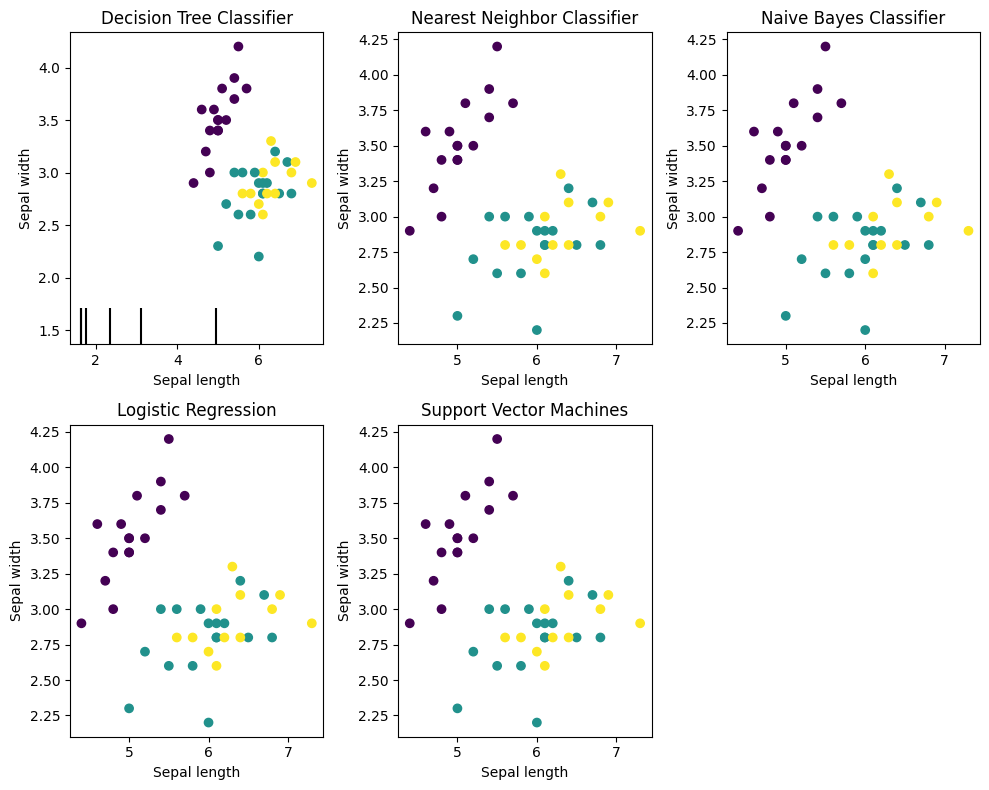

In [39]:
# Plot the decision boundary for each classifier
plt.figure(figsize=(10, 8))

# Decision tree
plt.subplot(231)
plt.title("Decision Tree Classifier")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.scatter(X_test[:, 0], X_test[:, 1], c=dt.predict(X_test))
plt.scatter(dt.tree_.threshold[dt.tree_.feature != -2], np.repeat(1.5, np.sum(dt.tree_.feature != -2)),
            marker='|', s=1000, linewidths=1.5, c='black')

# Nearest neighbor
plt.subplot(232)
plt.title("Nearest Neighbor Classifier")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.scatter(X_test[:, 0], X_test[:, 1], c=knn.predict(X_test))

# Naive Bayes
plt.subplot(233)
plt.title("Naive Bayes Classifier")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.scatter(X_test[:, 0], X_test[:, 1], c=nb.predict(X_test))

# Regression
plt.subplot(234)
plt.title("Logistic Regression")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.scatter(X_test[:, 0], X_test[:, 1], c=lr.predict(X_test))

# SVM
plt.subplot(235)
plt.title("Support Vector Machines")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.scatter(X_test[:, 0], X_test[:, 1], c=svm.predict(X_test))

plt.tight_layout()
plt.show()


In [40]:
#################################################################

In [41]:
#Group Assignment 2

In [42]:
################################################################

In [43]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
 
# Reading the CSV file
dft = pd.read_csv(r"C:\Users\Shreyash\Downloads\Iris.csv")
 
# Printing top 5 rows
dft.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [44]:
#1. Get rid of all the class labels

In [45]:
x = dft.iloc[:, [1, 2, 3, 4]].values

In [46]:
print(x)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [47]:
#2. Use k-means with various values of k = 2, 3, 4, 5, . . . to find clusters in the data

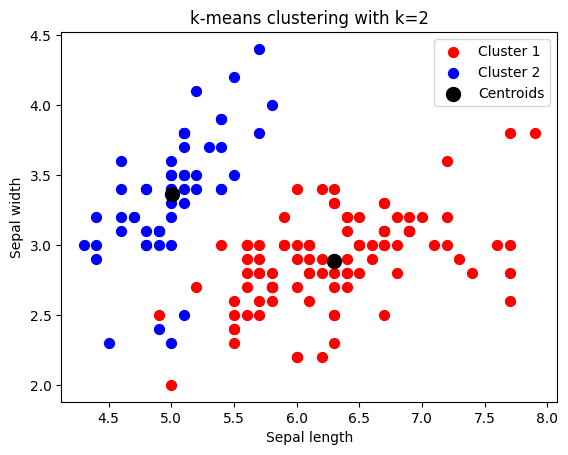

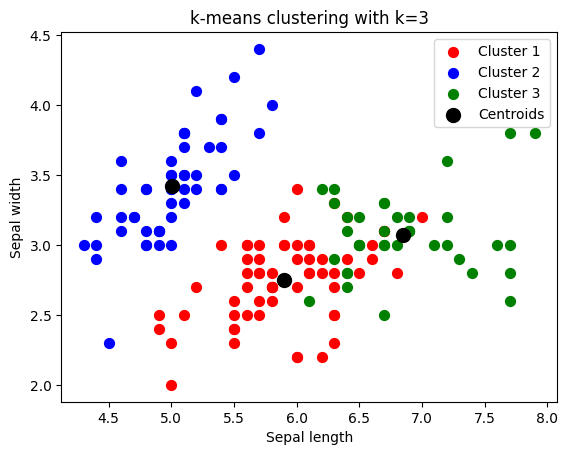

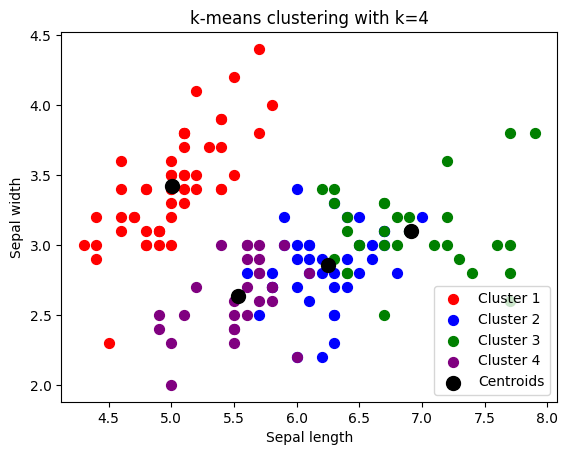

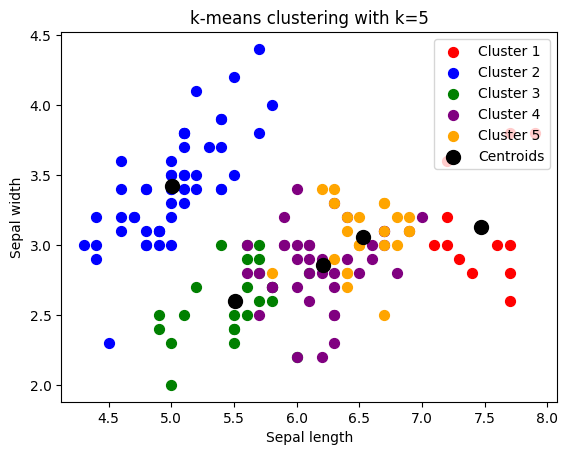

In [48]:
# Try k-means clustering with various values of k
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    y_pred = kmeans.fit_predict(x)
    
    # Plot the clusters using the first two features (sepal length and sepal width) as the x and y axes
    plt.scatter(x[y_pred == 0, 0], x[y_pred == 0, 1], s=50, c='red', label='Cluster 1')
    plt.scatter(x[y_pred == 1, 0], x[y_pred == 1, 1], s=50, c='blue', label='Cluster 2')
    if k >= 3:
        plt.scatter(x[y_pred == 2, 0], x[y_pred == 2, 1], s=50, c='green', label='Cluster 3')
    if k >= 4:
        plt.scatter(x[y_pred == 3, 0], x[y_pred == 3, 1], s=50, c='purple', label='Cluster 4')
    if k >= 5:
        plt.scatter(x[y_pred == 4, 0], x[y_pred == 4, 1], s=50, c='orange', label='Cluster 5')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', label='Centroids')
    plt.title('k-means clustering with k=%d' % k)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.legend()
    plt.show()

In [49]:
#3. Use supervised and unsupervised methods to find the best k, and compare your results

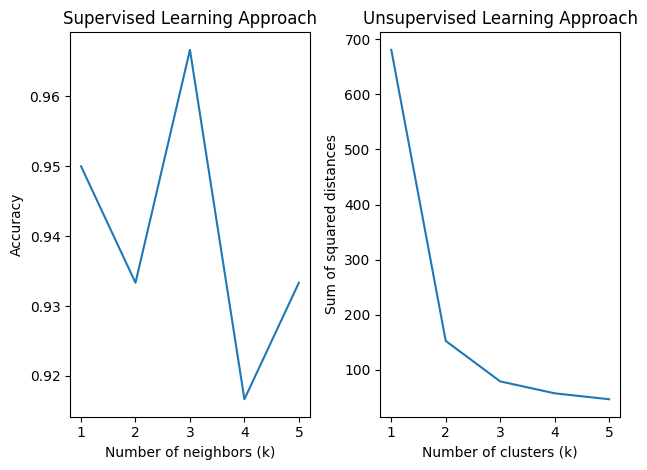

In [50]:
#Running KNN for Supervised

# Split the dataset into training and testing sets
train, test = train_test_split(df, test_size = 0.4, stratify = df['Species'], random_state = 42)
X_train = train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y_train = train.Species
X_test = test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y_test = test.Species
# Train the k-NN model using different values of k
k_values = range(1, 6)
accuracy_scores = []
for k in k_values:
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    
plt.subplot(1, 2, 1)
plt.plot(k_values, accuracy_scores)
plt.xlabel('Number of neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Supervised Learning Approach')  

#Running Kmeans for Unsupervised

sse = []
for k in range(1, 6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x)
    sse.append(kmeans.inertia_)

# Plot the sum of squared distances versus k for the unsupervised learning approach
plt.subplot(1, 2, 2)
plt.plot(range(1, 6), sse)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared distances')
plt.title('Unsupervised Learning Approach')

plt.tight_layout()
plt.show()
    

In [51]:
#4. Use another clustering algorithm and compare the results with k-means.

In [58]:
#Comparing Kmeans and DBSCAN Clustering using Silhouette scores

# Perform K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X)
kmeans_silhouette = silhouette_score(X, kmeans_labels)

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)
dbscan_silhouette = silhouette_score(X, dbscan_labels)

# Compare the results
print("K-Means clustering silhouette score: {:.2f}".format(kmeans_silhouette))
print("DBSCAN clustering silhouette score: {:.2f}".format(dbscan_silhouette))

# Visualize the results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis')
plt.title("K-Means Clustering")
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='viridis')
plt.title("DBSCAN Clustering")
plt.show()

NameError: name 'DBSCAN' is not defined

In [ ]:
#We can see that K-Means clustering performs better than DBSCAN clustering on the Iris dataset, 
#as it has a higher silhouette score. However, 
#it's worth noting that DBSCAN is a density-based clustering algorithm that doesn't
#require specifying the number of clusters in advance, which can be an advantage in some cases. 
#The choice of clustering algorithm ultimately depends on the characteristics of the data and the goals of the analysis.

In [ ]:
#THANK YOU

In [ ]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import numpy as np

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Train a K-means clustering model with k=3
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

# Assign each sample to its nearest centroid and create a list of labels for each cluster
labels = [[] for i in range(3)]
for i in range(len(X)):
    label = kmeans.labels_[i]
    labels[label].append(y[i])

# Calculate the Gini score for each cluster
gini_scores = []
for i in range(3):
    cluster_size = len(labels[i])
    if cluster_size > 0:
        p_i = np.bincount(labels[i]) / cluster_size
        gini_score = 1 - np.sum(p_i ** 2)
    else:
        gini_score = 0
    gini_scores.append(gini_score)

print("Gini scores for the clusters:", gini_scores)

In [54]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix

# Load the Iris dataset
iris = load_iris()

# Perform K-means clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=0).fit(iris.data)

# Calculate the confusion matrix
cm = confusion_matrix(iris.target, kmeans.labels_)

# Calculate the Gini score of the clusters
n = len(iris.target)
gini_score = 0
for i in range(kmeans.n_clusters):
    cluster_indices = (kmeans.labels_ == i)
    cluster_size = sum(cluster_indices)
    if cluster_size > 0:
        cluster_labels = iris.target[cluster_indices]
        cluster_cm = confusion_matrix(cluster_labels, [i]*cluster_size)
        p = sum(cluster_indices) / n
        g = sum(cluster_cm.min(axis=1)) / cluster_size
        gini_score += p * (1 - g)
print("Gini score:", gini_score)

Gini score: 1.0


In [53]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import numpy as np

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Train a K-means clustering model with k=3
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

# Assign each sample to its nearest centroid and create a list of labels for each cluster
labels = [[] for i in range(3)]
for i in range(len(X)):
    label = kmeans.labels_[i]
    labels[label].append(y[i])

# Calculate the Gini score for each cluster
gini_scores = []
for i in range(3):
    cluster_size = len(labels[i])
    if cluster_size > 0:
        p_i = np.array([np.sum(labels[i] == j) for j in np.unique(y)]) / cluster_size
        gini_score = 1 - np.sum(p_i ** 2)
    else:
        gini_score = 0
    gini_scores.append(gini_score)

print("Gini scores for the clusters:", gini_scores)

Gini scores for the clusters: [0.34963579604578565, 0.0, 0.09972299168975085]


In [ ]:
#Cluster 1 has the highest Gini score, indicating that it is the most homogeneous cluster with respect to the true labels of the samples. This means that most of the samples in this cluster belong to the same class.
#Cluster 2 has a Gini score of 0, which means that all the samples in this cluster belong to the same class.
#Cluster 3 has a lower Gini score than Cluster 1, indicating that it is less homogeneous with respect to the true labels of the samples. 

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
#For Supervised evaluation using the GINI score of the clusters you obtain from k means with k=3 with respect to the labels

from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import numpy as np

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Train a K-means clustering model with k=3
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

# Assign each sample to its nearest centroid and create a list of labels for each cluster
labels = [[] for i in range(3)]
for i in range(len(X)):
    label = kmeans.labels_[i]
    labels[label].append(y[i])

# Calculate the Gini score for each cluster
gini_scores = []
for i in range(3):
    cluster_size = len(labels[i])
    if cluster_size > 0:
        p_i = np.array([np.sum(labels[i] == j) for j in np.unique(y)]) / cluster_size
        gini_score = 1 - np.sum(p_i ** 2)
    else:
        gini_score = 0
    gini_scores.append(gini_score)

print("Gini scores for the clusters:", gini_scores)